# Generating Metallicity Data for Binned Spectra
Run this notebook to generate a 3D dataset containing the average galaxy spectrum for each age bin and metallicity combination. 10 bins and 12 metallicities gives 120 different spectra.

In [2]:
# imports
import os
os.environ['SPS_HOME'] = '/home/vmehta/honours-project/pyght/src/fsps'

import fsps
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('thesis')

In [2]:
# initialising as much as possible universally

sp = fsps.StellarPopulation(
    sfh=0,
    imf_type=1,
    nebemlineinspec=False,
)

bin_arr = np.r_[np.array([0.1, 20, 50, 100, 200, 500])*1e6, np.logspace(9.5, 10.15, 5)]
bins = np.log10(bin_arr)

In [3]:
def init_bins(zn):

    sp.params['zmet'] = zn
    w, s = sp.get_spectrum()
    w = w[470:2137]
    s = s[:, 470:2137]

    idx = np.digitize(sp.ssp_ages, bins, right=True)
    out = np.zeros((len(bins)-1, s.shape[1]))

    for t in range(1, len(bins)):
        mask = (idx == t)
        if mask.any():
            out[t-1] = s[mask].mean(axis=0)
        else:
            out[t-1] = np.nan
    
    return w, out

In [ ]:
# this cell takes 5-6 mins to run

table = np.zeros((10,12,1667))
for i in np.arange(1,13):
    table[:,i-1] = init_bins(i)[1]

table

In [4]:
z_mist = np.array([2.50, -2.00, -1.75, -1.50, -1.25, -1.00, -0.75, -0.50, -0.25, 0.00, 0.25, 0.50])

In [5]:
#np.save('/home/vmehta/honours-project/pyght/data/average_binned_spectra.npy', table)
#np.save('/home/vmehta/honours-project/pyght/data/wavelengths.npy', init_bins(1)[0])
np.save('/home/vmehta/honours-project/pyght/data/z_legend.npy', z_mist)

In [4]:
wavs = np.load('/home/vmehta/honours-project/pyght/data/wavelengths.npy')
table = np.load('/home/vmehta/honours-project/pyght/data/average_binned_spectra.npy')

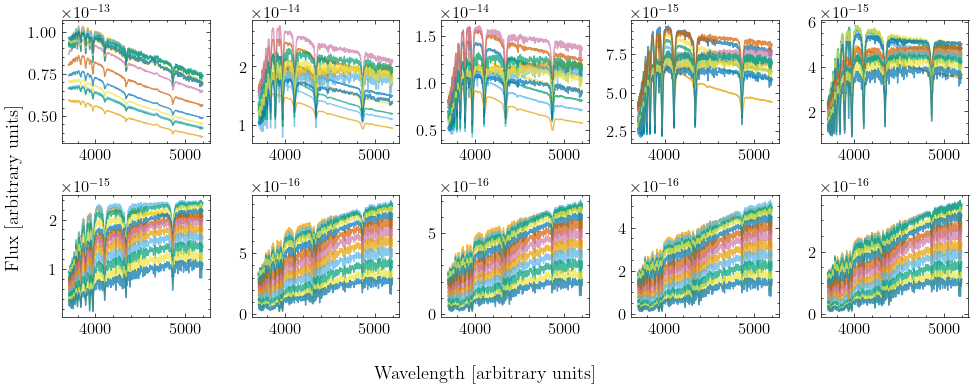

In [5]:
fig = plt.figure(figsize=(10,4))
ax = [None] * len(table)
for i in range(len(table)):
    ax[i] = fig.add_subplot(2, 5, i+1)
    for j in range(len(table[i])):
        plt.plot(wavs, table[i,j,:], alpha=0.7)

# for i in range(10):
#     ax[i].set_xticklabels([])
#     ax[i].set_yticklabels([])

fig.supxlabel('Wavelength [arbitrary units]')
fig.supylabel('Flux [arbitrary units]')
plt.tight_layout()
plt.savefig('/home/vmehta/honours-project/thesis/figures/metallicity-spectra.pdf')
plt.show()

In [43]:
sp.zlegend

array([4.49043431e-05, 1.42000001e-04, 2.52515678e-04, 4.49043431e-04,
       7.98524687e-04, 1.42000001e-03, 2.52515678e-03, 4.49043431e-03,
       7.98524687e-03, 1.42000001e-02, 2.52515678e-02, 4.49043431e-02])

In [44]:
sp.libraries

(b'mist', b'miles', b'DL07')